In [1]:
cd ..

/Users/matthieumarinangeli/statrise


In [2]:
from statrise import AsymptoticCalculator, Hypothesis, Observable, Model, Constant, Variable
import numpy as np
import matplotlib.pyplot as plt
import probfit
import iminuit
import math

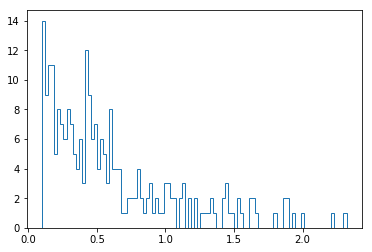

In [3]:
# First let's make some example data

np.random.seed(0)
tau = -2.0
beta = -1/tau
data = np.random.exponential(beta, 300)
peak = np.random.normal(1.2, 0.1, 4)
data = np.concatenate((data,peak))
data = data[(data > 0.1) & (data < 3)]

plt.hist(data, bins=100, histtype='step');

In [4]:
exp_n = probfit.Normalized(probfit.exponential, (0.1,3.))
gauss_n = probfit.Normalized(probfit.gaussian, (0.1,3.))
exp = probfit.Extended(exp_n, extname='Nbkg')
gauss = probfit.Extended(gauss_n, extname='Nsig')
totpdf = probfit.AddPdf(gauss, exp)
UL = probfit.UnbinnedLH(totpdf, data, extended=True, extended_bound = (0.1,3.))

In [5]:
iminuit.describe(totpdf)

['x', 'mean', 'sigma', 'Nsig', 'tau', 'Nbkg']

In [6]:
initial_params = {"tau":  -0.5,  "limit_tau":    (-5.0, -0.1) , "error_tau"   : 0.05,
                  "mean":  1.2,  "limit_mean":    (0.8, 1.7) , "error_mean"   : 0.01, "fix_mean": True,
                  "sigma": 0.1, "limit_sigma":   (0.02, 0.12), "error_sigma" : 0.0001, "fix_sigma": True,
                  "Nsig":  0,    "limit_Nsig": (-10,len((data))), "error_Nsig"  : 1.0,
                  "Nbkg":  len(data),    "limit_Nbkg": (0,len(data)*1.1), "error_Nbkg"  : 1.0
                 }

minuit = iminuit.Minuit(UL, **initial_params, pedantic=True)

In [7]:
minuit.migrad();

FCN = -1052.228966534879 
 TOTAL NCALL = 60 
 NCALLS = 60 
 
 
 EDM = 4.4192656280447616e-05 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,mean,1.2,0.01,,,0.8,1.7,Yes
1,sigma,0.1,0.0001,,,0.02,0.12,Yes
2,Nsig,-1.60582,5.01428,,,-10,250,No
3,tau,-1.92458,0.1388,,,-5,-0.1,No
4,Nbkg,251.495,16.5174,,,0,275,No


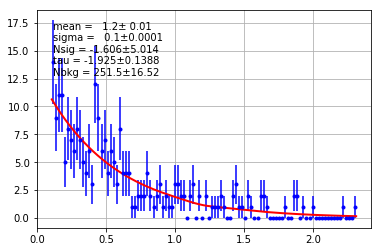

In [8]:
UL.show(minuit);

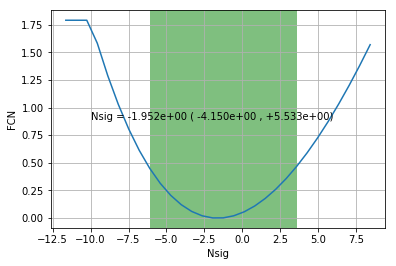

In [9]:
minuit.draw_mnprofile("Nsig",subtract_min=True);

In [10]:
math.sqrt(len(data))

15.811388300841896

In [11]:
model = Model(totpdf)
model.add_obs(Observable("x", range = (0.1,3.0)))
#mean  = Variable("mean",  range=(0.8,1.7),            initvalue= 1.2,       initstep=0.01)
mean  = Constant("mean",  value=1.2)
#sigma = Variable("sigma", range= (0.02, 0.12),        initvalue= 0.06,       initstep=0.0001)
sigma = Constant("sigma", value= 0.1)
Nsig  = Variable("Nsig",  range=(-10,len((data))),   initvalue= 0.0,       initstep=1.0)
tau   = Variable("tau",   range=(-5.0, -0.1),        initvalue=-0.5,       initstep=0.05)
Nbkg  = Variable("Nbkg",  range=(0,len((data))*1.1), initvalue= len(data), initstep=1.0)
model.add_vars([mean, sigma, Nsig, tau, Nbkg])
model.ext_pars = ["Nsig","Nbkg"]

In [12]:
model_bkg = Model(exp)
model_bkg.add_obs(Observable("x", range = (0.1,3.0)))
model_bkg.add_vars([tau, Nbkg])
model_bkg.ext_pars = ["Nbkg"]

In [13]:
model.obs

[Observable('x', range=(0.1, 3.0))]

In [14]:
model.vars

[Constant('mean', value=1.2),
 Constant('sigma', value=0.1),
 Variable('Nsig', initvalue=0.0, range=(-10, 250), initstep=1.0),
 Variable('tau', initvalue=-0.5, range=(-5.0, -0.1), initstep=0.05),
 Variable('Nbkg', initvalue=250, range=(0, 275.0), initstep=1.0)]

In [15]:
null_hypothesis = model.create_hypothesis({"Nsig":np.linspace(0.1, 12, 60)})

In [16]:
null_hypothesis.pois

{'Nsig': array([ 0.1       ,  0.30169492,  0.50338983,  0.70508475,  0.90677966,
         1.10847458,  1.31016949,  1.51186441,  1.71355932,  1.91525424,
         2.11694915,  2.31864407,  2.52033898,  2.7220339 ,  2.92372881,
         3.12542373,  3.32711864,  3.52881356,  3.73050847,  3.93220339,
         4.13389831,  4.33559322,  4.53728814,  4.73898305,  4.94067797,
         5.14237288,  5.3440678 ,  5.54576271,  5.74745763,  5.94915254,
         6.15084746,  6.35254237,  6.55423729,  6.7559322 ,  6.95762712,
         7.15932203,  7.36101695,  7.56271186,  7.76440678,  7.96610169,
         8.16779661,  8.36949153,  8.57118644,  8.77288136,  8.97457627,
         9.17627119,  9.3779661 ,  9.57966102,  9.78135593,  9.98305085,
        10.18474576, 10.38644068, 10.58813559, 10.78983051, 10.99152542,
        11.19322034, 11.39491525, 11.59661017, 11.79830508, 12.        ])}

In [17]:
alt_hypothesis = model.create_hypothesis({"Nsig":0})
#alt_hypothesis = model_bkg.create_hypothesis()
alt_hypothesis.pois

{'Nsig': 0}

In [18]:
null_hypothesis.poinames()

['Nsig']

In [19]:
alt_hypothesis

Hypothesis object: 
Observables: ['x']
Paramaters of interest: {'Nsig': 0}
Nuisance parameters: ['mean', 'sigma', 'tau', 'Nbkg']
Extended parameters: ['Nsig', 'Nbkg']

In [20]:
calc = AsymptoticCalculator(null_hypothesis, alt_hypothesis, data)

In [21]:
calc.qtilde = False

In [22]:
calc.bestfitpoi = minuit.values["Nsig"]

In [23]:
calc.null_hypothesis

Hypothesis object: 
Observables: ['x']
Paramaters of interest: {'Nsig': array([ 0.1       ,  0.30169492,  0.50338983,  0.70508475,  0.90677966,
        1.10847458,  1.31016949,  1.51186441,  1.71355932,  1.91525424,
        2.11694915,  2.31864407,  2.52033898,  2.7220339 ,  2.92372881,
        3.12542373,  3.32711864,  3.52881356,  3.73050847,  3.93220339,
        4.13389831,  4.33559322,  4.53728814,  4.73898305,  4.94067797,
        5.14237288,  5.3440678 ,  5.54576271,  5.74745763,  5.94915254,
        6.15084746,  6.35254237,  6.55423729,  6.7559322 ,  6.95762712,
        7.15932203,  7.36101695,  7.56271186,  7.76440678,  7.96610169,
        8.16779661,  8.36949153,  8.57118644,  8.77288136,  8.97457627,
        9.17627119,  9.3779661 ,  9.57966102,  9.78135593,  9.98305085,
       10.18474576, 10.38644068, 10.58813559, 10.78983051, 10.99152542,
       11.19322034, 11.39491525, 11.59661017, 11.79830508, 12.        ])}
Nuisance parameters: ['mean', 'sigma', 'tau', 'Nbkg']
Extended

In [24]:
calc.alt_hypothesis

Hypothesis object: 
Observables: ['x']
Paramaters of interest: {'Nsig': 0}
Nuisance parameters: ['mean', 'sigma', 'tau', 'Nbkg']
Extended parameters: ['Nsig', 'Nbkg']

In [25]:
calc.null_likelihood()

In [26]:
iminuit.describe(calc.null_likelihood())

['mean', 'sigma', 'Nsig', 'tau', 'Nbkg']

In [27]:
calc.bestfitpoi

-1.6058229972335383

In [28]:
asy_data = calc.asymov_dataset()

FCN = -1052.1791626264346 
 TOTAL NCALL = 41 
 NCALLS = 41 
 
 
 EDM = 4.333773370389959e-09 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,mean,1.2,1,,,,,Yes
1,sigma,0.1,1,,,,,Yes
2,Nsig,0,1,,,-10,250,Yes
3,tau,-1.94134,0.130418,,,-5,-0.1,No
4,Nbkg,250.001,15.7063,,,0,275,No


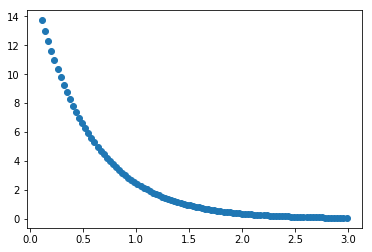

In [29]:
plt.plot(asy_data[0], asy_data[1], "o");

In [30]:
asy_data[1]

array([13.73523041, 12.98331642, 12.2725648 , 11.60072218, 10.96565855,
       10.3653605 ,  9.79792483,  9.26155256,  8.75454316,  8.2752892 ,
        7.82227127,  7.3940531 ,  6.98927707,  6.60665989,  6.24498849,
        5.90311623,  5.57995925,  5.27449299,  4.98574901,  4.71281188,
        4.45481626,  4.21094422,  3.98042258,  3.76252049,  3.55654711,
        3.36184943,  3.17781017,  3.00384586,  2.83940495,  2.68396611,
        2.53703653,  2.39815038,  2.26686734,  2.14277118,  2.02546848,
        1.91458734,  1.80977621,  1.7107028 ,  1.61705302,  1.52852995,
        1.44485293,  1.36575669,  1.29099045,  1.22031717,  1.15351279,
        1.09036551,  1.03067513,  0.97425241,  0.92091847,  0.87050421,
        0.8228498 ,  0.77780416,  0.73522447,  0.69497574,  0.65693037,
        0.62096773,  0.58697381,  0.55484083,  0.52446693,  0.49575579,
        0.46861641,  0.44296273,  0.41871342,  0.3957916 ,  0.3741246 ,
        0.35364372,  0.33428404,  0.31598418,  0.29868611,  0.28

In [31]:
calc._scan_nll()

{'clsb': array([0.36891872, 0.35459636, 0.34054802, 0.32678665, 0.31332391,
        0.30017021, 0.2873347 , 0.27482527, 0.26264861, 0.2508102 ,
        0.23931438, 0.22818039, 0.21738259, 0.20693201, 0.19683318,
        0.18708321, 0.17768039, 0.16862218, 0.15990527, 0.15152563,
        0.1434786 , 0.13575888, 0.12836064, 0.12128279, 0.11450832,
        0.10803511, 0.10185566, 0.09596222, 0.09034679, 0.08500118,
        0.07991704, 0.07508593, 0.0704993 , 0.06614859, 0.06202523,
        0.05812067, 0.05442639, 0.05093399, 0.04763514, 0.04452164,
        0.04158542, 0.03881858, 0.03621339, 0.03376229, 0.03145794,
        0.02929317, 0.02726105, 0.02535485, 0.02356807, 0.02189444,
        0.0203279 , 0.01886263, 0.01749304, 0.01621375, 0.01501963,
        0.01390576, 0.01286742, 0.01190014, 0.01099964, 0.01016184]),
 'clb': array([0.37681846, 0.37743782, 0.37804686, 0.37865021, 0.37924846,
        0.37984181, 0.38043035, 0.38101417, 0.38159334, 0.38216792,
        0.38270524, 0.38328166,

In [32]:
calc.null_hypothesis.pois

{'Nsig': array([ 0.1       ,  0.30169492,  0.50338983,  0.70508475,  0.90677966,
         1.10847458,  1.31016949,  1.51186441,  1.71355932,  1.91525424,
         2.11694915,  2.31864407,  2.52033898,  2.7220339 ,  2.92372881,
         3.12542373,  3.32711864,  3.52881356,  3.73050847,  3.93220339,
         4.13389831,  4.33559322,  4.53728814,  4.73898305,  4.94067797,
         5.14237288,  5.3440678 ,  5.54576271,  5.74745763,  5.94915254,
         6.15084746,  6.35254237,  6.55423729,  6.7559322 ,  6.95762712,
         7.15932203,  7.36101695,  7.56271186,  7.76440678,  7.96610169,
         8.16779661,  8.36949153,  8.57118644,  8.77288136,  8.97457627,
         9.17627119,  9.3779661 ,  9.57966102,  9.78135593,  9.98305085,
        10.18474576, 10.38644068, 10.58813559, 10.78983051, 10.99152542,
        11.19322034, 11.39491525, 11.59661017, 11.79830508, 12.        ])}

In [33]:
calc._poi.name

'Nsig'

In [34]:
calc._asy_nll

{0: array([-1052.11923784]),
 0.1: array([-1052.11902004]),
 0.3016949152542373: array([-1052.11739417]),
 0.5033898305084746: array([-1052.11420244]),
 0.7050847457627119: array([-1052.10946919]),
 0.9067796610169492: array([-1052.10321819]),
 1.1084745762711865: array([-1052.09547263]),
 1.3101694915254238: array([-1052.08625516]),
 1.5118644067796612: array([-1052.07558789]),
 1.7135593220338985: array([-1052.06349243]),
 1.9152542372881358: array([-1052.04998989]),
 2.116949152542373: array([-1052.03513607]),
 2.3186440677966105: array([-1052.01889503]),
 2.5203389830508476: array([-1052.00130477]),
 2.722033898305085: array([-1051.98239632]),
 2.9237288135593222: array([-1051.962184]),
 3.12542372881356: array([-1051.94068679]),
 3.327118644067797: array([-1051.91792327]),
 3.528813559322034: array([-1051.89391167]),
 3.7305084745762715: array([-1051.86866983]),
 3.9322033898305087: array([-1051.84221523]),
 4.133898305084745: array([-1051.81456501]),
 4.335593220338983: array([-1

In [35]:
ul = calc.upperlimit()

Observed upper limit: Nsig = 10.215779298129174
Expected upper limit: Nsig = 11.102736930183193
Expected upper limit +1 sigma: Nsig = 15.448863322606792
Expected upper limit -1 sigma: Nsig = 7.998617549596047
Expected upper limit +2 sigma: Nsig = 20.710295114419804
Expected upper limit -2 sigma: Nsig = 5.957993532137475


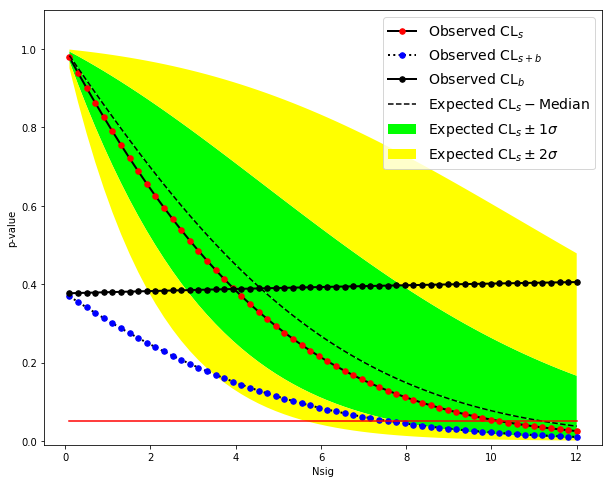

In [36]:
calc.plot()

In [37]:
calc.onesided

True

In [38]:
calc.onesideddiscovery

False

In [39]:
calc.result()

p_value for the Null hypothesis = 0.3761169929666117
Significance = 0.3156950477652146
CL_b = 0.3761169929666117
CL_s+b = 0.3761169929666117
CL_s = 1.0
